In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
"""%matplotlib widget"""

'%matplotlib widget'

In [67]:
data = np.loadtxt("house.txt", dtype=float, delimiter=',')

In [68]:
x1_train = data[:,0]/1000
x2_train = data[:,1]
y_train = data[:,2]/100000
m = len(x1_train)

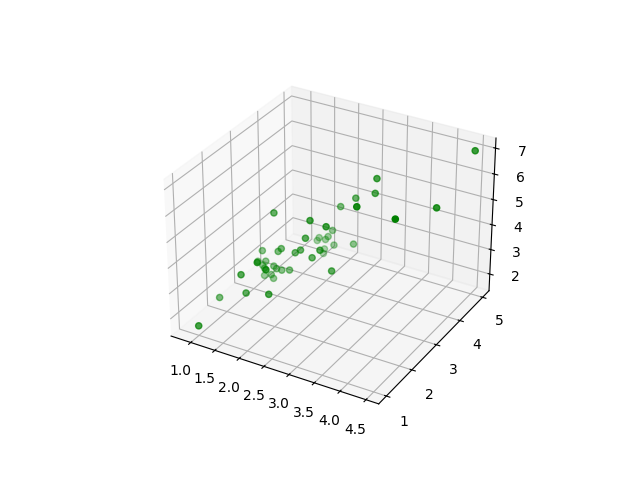

In [69]:
"""fig = plt.figure() 
ax = Axes3D(fig) 
ax = plt.axes(projection='3d')
plot_geeks = ax.scatter(x1_train, x2_train, y_train, color='green')

plt.show()"""

In [70]:
#computing cost function
def compute_cost(x1, x2, y, theta_0, theta_1, theta_2):
    cost_sum = 0
    for i in range (m):
        h = theta_0 + theta_1*x1[i] + theta_2*x2[i]
        cost = (h - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = 0.5*cost_sum
    return total_cost

In [71]:
cost = compute_cost(x1_train, x2_train, y_train, 0, 0, 0)
print(cost)

308.28027610035


In [72]:
#computing gradients dj_dt_0, dj_dt_1 and dJ_dt_2
def gradient(x1, x2, y, theta_0, theta_1, theta_2):
    dj_dt0 = 0
    dj_dt1 = 0
    dj_dt2 = 0
    for i in range (m):
        h = theta_0 + theta_1*x1[i] + theta_2*x2[i]
        dj_dt0_f = (h - y[i])
        dj_dt1_f = (h- y[i])*x1[i]
        dj_dt2_f = (h- y[i])*x2[i]
        
        dj_dt0 = dj_dt0 + dj_dt0_f
        dj_dt1 = dj_dt1 + dj_dt1_f
        dj_dt2 = dj_dt2 + dj_dt2_f
    return dj_dt0, dj_dt1, dj_dt2

In [73]:
t1, t2, t3 = gradient(x1_train, x2_train, y_train, 0, 0, 0)
print(t1,t2,t3)

-159.99395 -359.17829025000015 -526.57282


In [74]:
#implementing gradient descent
def gradient_descent(x1, x2, y, theta_0, theta_1, theta_2, alpha, num, gradient):
    theta_0 = theta_0
    theta_1 = theta_1
    theta_2 = theta_2
    
    for i in range (num):    
        dj_dt0, dj_dt1, dj_dt2 = gradient(x1, x2, y, theta_0, theta_1, theta_2)
        
        theta_0 = theta_0 - alpha*dj_dt0
        theta_1 = theta_1 - alpha*dj_dt1
        theta_2 = theta_2 - alpha*dj_dt2
        
    return theta_0, theta_1, theta_2

In [75]:
theta_0 = 0
theta_1 = 0
theta_2 = 0
alpha = 0.001
num = 510
final_0, final_1, final_2 = gradient_descent(x1_train, x2_train, y_train, theta_0, theta_1, theta_2, alpha, num, gradient)
print(final_0, final_1, final_2)

0.6337189076416399 1.3905462900055934 -0.007713823271521805


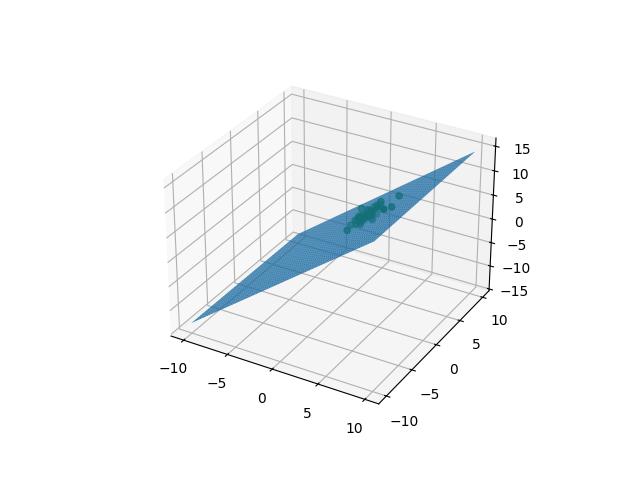

In [77]:
fig = plt.figure() 
ax = Axes3D(fig) 
ax = plt.axes(projection='3d')


x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
eq = final_0 + final_1*x + final_2*y
plot_geeks = ax.scatter(x1_train, x2_train, y_train, color='green')
ax.plot_surface(x, y, eq)

plt.show()
